In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

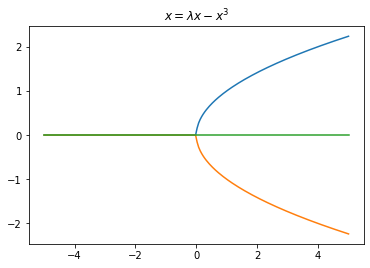

In [17]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, 
                             maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return lmbda * x - x**3

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), -np.sqrt(5), F)
C3, X3 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 0, F)
plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.title(r"$x = \lambda x - x^3$")
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

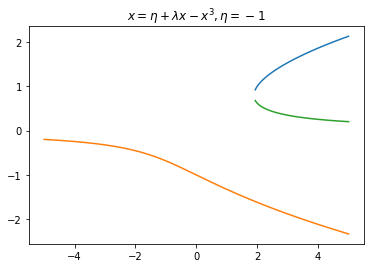

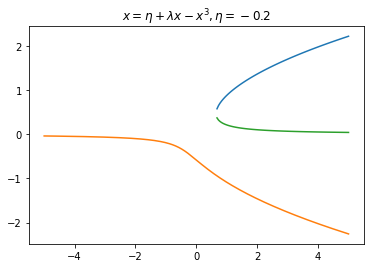

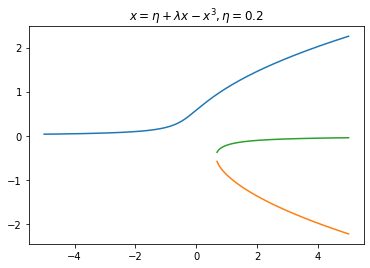

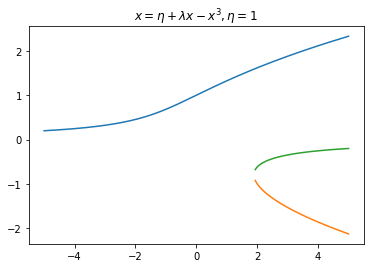

In [31]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, 
                             maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

for eta in [-1, -.2, .2, 1]:
    def F(x, lmbda):
        return eta + lmbda * x - x**3

    C1, X1 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), np.sqrt(5), F)
    C2, X2 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), -np.sqrt(5), F)
    C3, X3 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 0, F)
    plt.plot(C1, X1)
    plt.plot(C2, X2)
    plt.plot(C3, X3)
    plt.title(r"$x = \eta + \lambda x - x^3, \eta = {}$".format(eta))
    plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

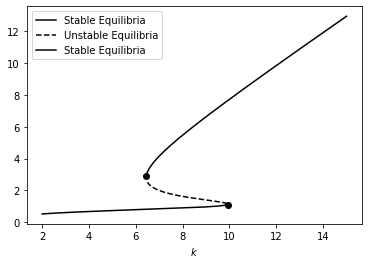

In [96]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, 
                             maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, k):
    return .56 * x * (1 - x/k) - ((x**2) / (1+x**2))

C1, X1 = EmbeddingAlg(np.linspace(2, 10, 200), .3, F)
C2, X2 = EmbeddingAlg(np.linspace(9.92, 6.5, 200), 2, F)
C3, X3 = EmbeddingAlg(np.linspace(15, 6, 200), 12, F)
plt.plot(C1, X1, color='black', label='Stable Equilibria')
plt.plot(C2, X2, '--', color='black', label='Unstable Equilibria')
plt.plot(C3, X3, color='black', label='Stable Equilibria')
plt.xlabel(r"$k$")
plt.scatter(C1[-1], X1[-1], color='black')
plt.scatter(C3[-1], X3[-1], color='black')
plt.legend()
plt.show()